In [1]:
import pandas as pd
import sys 
import os
from src.data_analyzer import DataAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse de la qualité des données

In [2]:
# Chargement des données 
data=pd.read_csv('../data/raw/data.csv',delimiter=',', encoding='ISO-8859-1')
analyzer = DataAnalyzer(data)

In [3]:
# Schéma des données
analyzer.display_summary()

Vue globale des données : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [4]:
# Consistance des données
analyzer.product_id_consistency().sort_values(by="Description_Count", ascending = False) 

,StockCode,Description_Count,Descriptions
25,20713,9,"[JUMBO BAG OWLS, nan, wrongly marked. 23343 in..."
314,23084,8,"[RABBIT NIGHT LIGHT, nan, temp adjustment, all..."
137,21830,7,"[ASSORTED CREEPY CRAWLIES, MERCHANT CHANDLER C..."
627,85175,7,"[CACTI T-LIGHT CANDLES, Amazon sold sets, dotc..."
68,21181,6,"[PLEASE ONE PERSON METAL SIGN, on cargo order,..."
...,...,...,...
645,90195A,2,"[PURPLE GEMSTONE BRACELET, check]"
646,90210D,2,"[PURPLE ACRYLIC FACETED BANGLE, check]"
647,DCGS0003,2,"[BOXED GLASS ASHTRAY, ebay]"
648,DCGS0069,2,"[OOH LA LA DOGS COLLAR, ebay]"


In [5]:
# Analyse des valeurs manquantes
analyzer.count_missing_values()

,Column,Missing Values
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


In [6]:
data[(data['Description'].isnull()) & (data['CustomerID'].isnull())].sort_values(by = "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517719,580087,84341B,NaN,-2,12/1/2011 14:27,0.0,NaN,United Kingdom
516189,579880,22947,NaN,5,11/30/2011 17:14,0.0,NaN,United Kingdom
514651,579738,21927,NaN,8,11/30/2011 14:26,0.0,NaN,United Kingdom
514287,579691,47503A,NaN,-5,11/30/2011 14:05,0.0,NaN,United Kingdom
514205,579688,21116,NaN,-33,11/30/2011 13:51,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [7]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


## Remarques : 
1) La colonne InvoiceDate n'est pas au bon format
2) Absence de descriptions produits dans 1454 transactions
3) Absence de l'ID client dans 135080 problématique !
4) Les descriptions des produit ne sont pas normalisées

## Analyse statistique des données

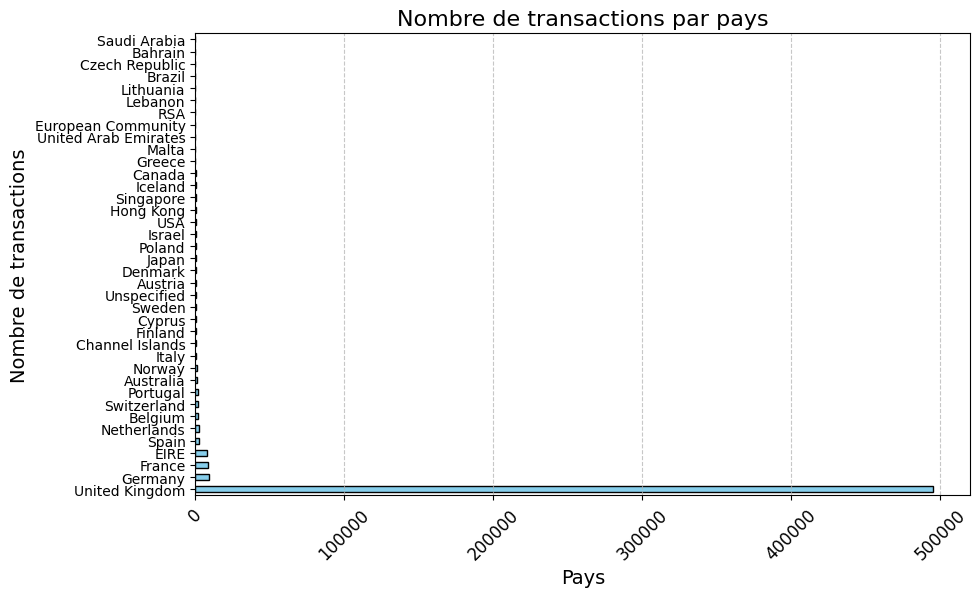

In [8]:
analyzer.country_distrib()

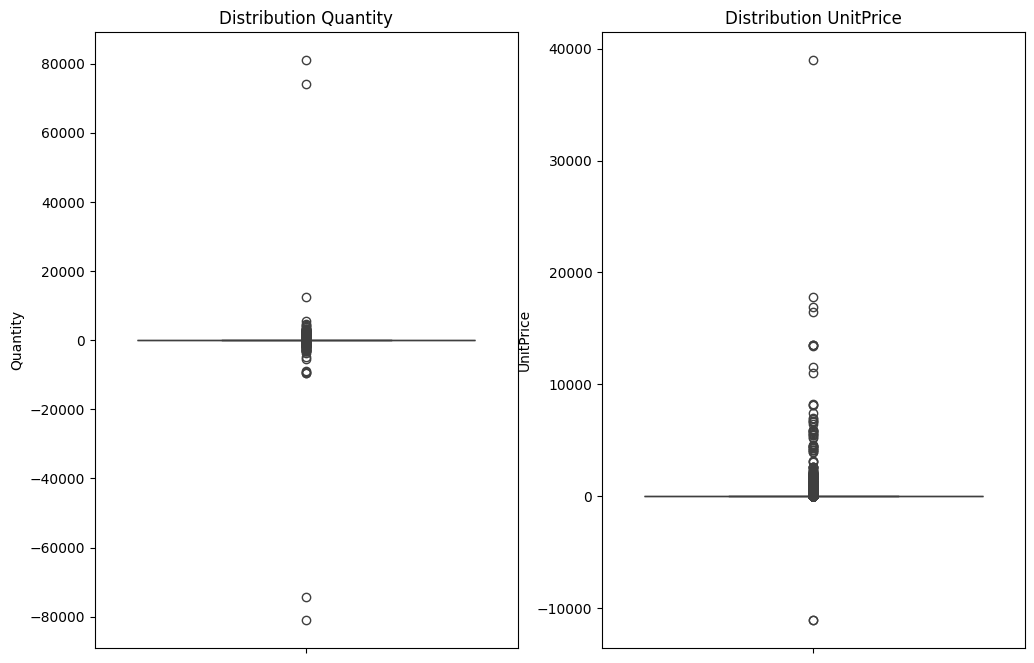

In [9]:
analyzer.stat_analitics()

## Remarques :
1) Les données sont majoritairement issues du royaume uni
2) Ils existent des enregistrements avec des quantités et des prix negatifs ou null ainsi que des cas isolés qui seont probablement des outliers